In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy as np
import math

In [3]:
# rad
a0 = 0.05984281113
# lift curve slope 
cla = 4.752798721
# drag curve slope
cda = 0.6417112299
#  AoA at which wing stalls in rads
alpha_stall = 0.3391428111
alpha_stallDeg = np.rad2deg(0.3391428111)
cla_stall = -3.85
cda_stall = -0.9233984055

area = 0.6
air_density = 1.2041
g = 9.81
mass = 1.5

In [4]:
def coefficientLift(cla, alpha, alpha0):
    Cl = cla*(alpha - alpha0)
    return Cl

def dynamicPressure(rho, v):
    Q = .5 * rho * (v*v)
    return Q    
    
def lift(cl, Q, S):
    L = cl * Q * S
    return L

def velocity(lift, cl, s, rho):
    V = np.sqrt((2 * lift) / (cl * s * rho))
    return V

def loadFactor(lift, weigt):
    lf = lift/weight
    return lf

def stall_speed(m, g, rho, s, ClMax):
    Vstall = np.sqrt(2*m*g/(rho * s * ClMax))
    return Vstall

def slf_speed(l, w, rho, s, clMax):
    slfSpeed = np.sqrt((2 * l / w) / (rho * s * ClMax))
    return slfSpeed

def weight(m, g):
    w = m * g
    return w

def loadFactor2(cl, rho, vel, s, m, g):
    n = ((cl * (.5 * rho * pow(vel, 2)) * s) / (m * g))
    return n

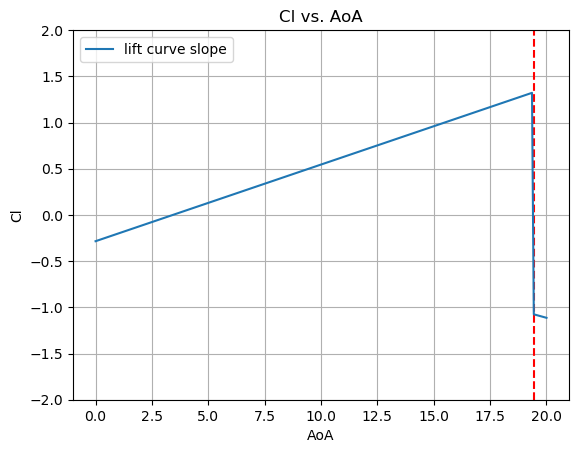

In [6]:

angle_list = np.linspace(0, 20, 250)
angle_list = np.deg2rad(angle_list)
cl_list = []

for i in angle_list:

    if i < alpha_stall:
        Cl = coefficientLift(cla, i, a0)
        cl_list.append(Cl)

    else:
        Cl = coefficientLift(cla_stall, i, a0)
        cl_list.append(Cl)

angle_listDeg = np.rad2deg(angle_list)

plt.axvline(x=alpha_stallDeg, color='r', linestyle='--')
plt.plot(angle_listDeg, cl_list, label = 'lift curve slope')
plt.xlabel('AoA')
plt.ylim(-2, 2)
plt.ylabel('Cl')
plt.title('Cl vs. AoA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

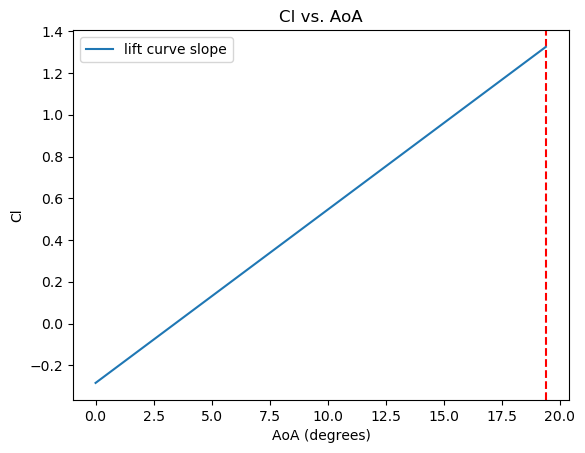

195
195


In [5]:
angle_list = np.arange(0, alpha_stall, 0.1*np.pi/180) # Use step size of 0.1 degrees
cl_list = []

for i in angle_list:
    Cl = coefficientLift(cla, i, a0)
    cl_list.append(Cl)


plt.axvline(x=np.rad2deg(alpha_stall), color='r', linestyle='--')
plt.plot(np.rad2deg(angle_list), cl_list, label='lift curve slope')
plt.xlabel('AoA (degrees)')
plt.ylabel('Cl')
plt.title('Cl vs. AoA')
plt.legend(loc='best')
plt.grid(False)
plt.show()
print(len(cl_list))
print(len(angle_list))

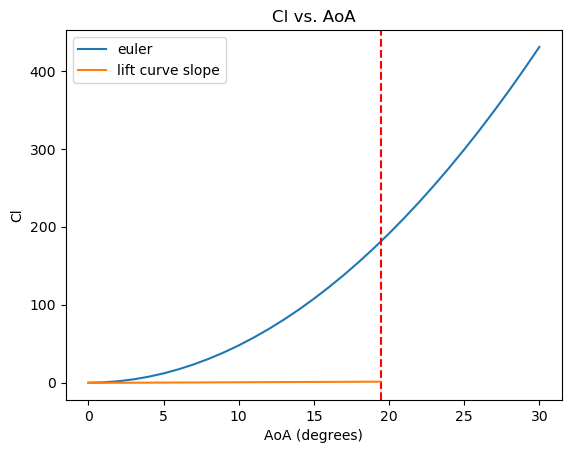

In [23]:
def euler_solve(derivative_func, x_initial, y_initial, x_start, x_stop, step_size):
    x_values = np.arange(x_start, x_stop, step_size)
    y_values = [y_initial]
    x = x_initial
    y = y_initial
    for x_next in x_values[1:]:
        derivative = derivative_func(x, y)
        y_next = y + step_size * derivative
        y_values.append(y_next)
        x = x_next
        y = y_next
    return x_values, y_values

def derivative_function(x, y):
    return clMax * air_density * x * area

x_initial = 0
y_initial = 0
x_start = 0
x_stop = 20
step_size = 1

velocity_list, euler_lift_list = euler_solve(derivative_function, x_initial, y_initial, x_start, x_stop, step_size)

plt.plot(speed_list, lift_list, label='euler')
plt.axvline(x=np.rad2deg(alpha_stall), color='r', linestyle='--')
plt.plot(np.rad2deg(angle_list), cl_list, label='lift curve slope')
plt.xlabel('AoA (degrees)')
plt.ylabel('Cl')
plt.title('Cl vs. AoA')
plt.legend(loc='best')
plt.grid(False)
plt.show()

In [6]:
clMax = max(cl_list)
vStall = stall_speed(mass, g, air_density, area, clMax)

print(clMax)
print(vStall)

1.3248476993011835
5.545047231354144


1.3248476993011835
541.845
30


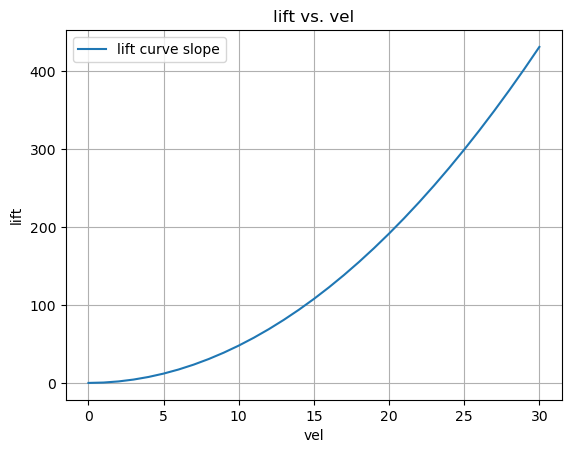

In [21]:
speed_list = np.arange(31)

lift_list = []
dyn_list = []

for speed in speed_list:
    Q = dynamicPressure(air_density, speed)
    dyn_list.append(Q)
    L = lift(clMax, Q, area)
    lift_list.append(L)

print(clMax)
print(max(dyn_list))
print(max(speed_list))

plt.plot(speed_list, lift_list, label = 'lift curve slope')
plt.xlabel('vel')
plt.ylabel('lift')
plt.title('lift vs. vel')
plt.legend(loc='best')
plt.grid(True)
plt.show()

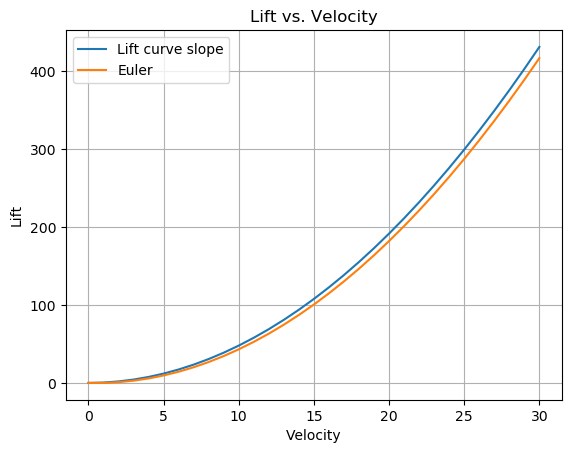

In [22]:
def derivative_function(x, y):
    cl = clMax  # Assuming clMax is constant in this case
    return cl * air_density * x * area


speed_list = np.arange(31)

lift_list = []
dyn_list = []

for speed in speed_list:
    Q = dynamicPressure(air_density, speed)
    dyn_list.append(Q)
    L = lift(clMax, Q, area)
    lift_list.append(L)

def euler_solve(derivative_func, x_initial, y_initial, x_start, x_stop, step_size):
    x_values = np.arange(x_start, x_stop, step_size)
    y_values = [y_initial]
    x = x_initial
    y = y_initial
    for x_next in x_values[1:]:
        derivative = derivative_func(x, y)
        y_next = y + step_size * derivative
        y_values.append(y_next)
        x = x_next
        y = y_next
    return x_values, y_values

def derivative_function(x, y):
    return clMax * air_density * x * area

x_initial = 0
y_initial = 0
x_start = 0
x_stop = 31
step_size = 1

velocity_list, euler_lift_list = euler_solve(derivative_function, x_initial, y_initial, x_start, x_stop, step_size)

plt.plot(speed_list, lift_list, label='Lift curve slope')
plt.plot(velocity_list, euler_lift_list, label='Euler')
plt.xlabel('Velocity')
plt.ylabel('Lift')
plt.title('Lift vs. Velocity')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# N vs. Velocity

load factor: 29.270625958322114
lift max:    430.7172609767099
Cl Max:      1.3248476993011835
Vel stall:   5.545047231354144


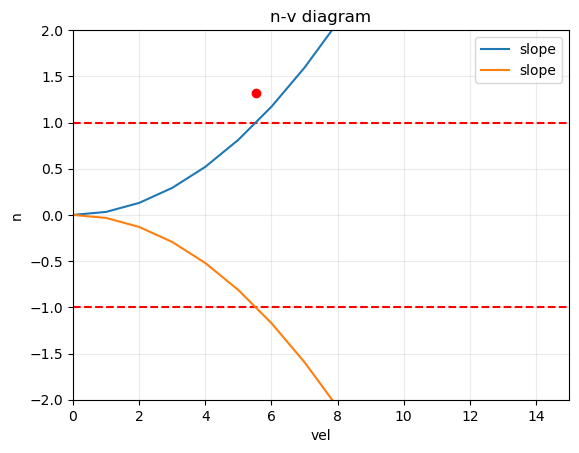

In [8]:
n_list = []
negn_list = []

const = clMax * .8
for vel in speed_list:
    n = loadFactor2(clMax, air_density, vel, area, mass, g)
    n_list.append(n)

for vel in speed_list:
    n = loadFactor2(-clMax, air_density, vel, area, mass, g)
    negn_list.append(n)

nMax = max(n_list)
lMax = max(lift_list)
print(f"load factor: {nMax}")
print(f"lift max:    {lMax}")
print(f"Cl Max:      {clMax}")
print(f"Vel stall:   {vStall}")

plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='r', linestyle='--')
# plt.axvline(x=vStall, color='r', linestyle='--')
plt.plot(speed_list, n_list, label = 'slope')
plt.plot(speed_list, negn_list, label = 'slope')
plt.plot(vStall, clMax, 'ro')

plt.xlim(0, 15)
plt.xlabel('vel')
plt.ylim(-2, 2)
plt.ylabel('n')
plt.title('n-v diagram')
plt.legend(loc='best')
plt.grid(True, alpha=.25)
plt.show()

load factor: 29.270625958322114
lift max:    430.7172609767099
Cl Max:      1.3248476993011835
Vel stall:   5.545047231354144


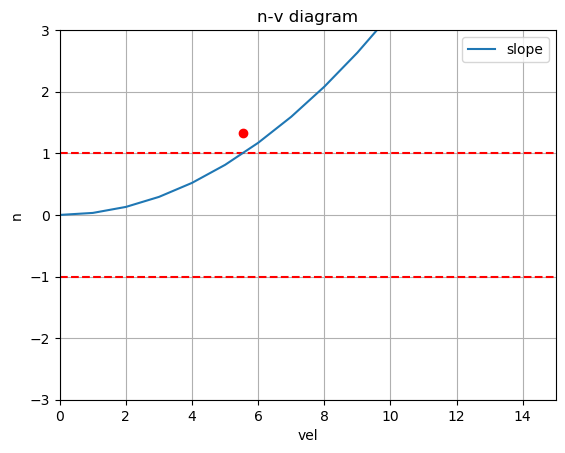

In [9]:
n_list = []

for vel in speed_list:
    n = loadFactor2(clMax, air_density, vel, area, mass, g)
    n_list.append(n)

nMax = max(n_list)
lMax = max(lift_list)
print(f"load factor: {nMax}")
print(f"lift max:    {lMax}")
print(f"Cl Max:      {clMax}")
print(f"Vel stall:   {vStall}")

plt.axhline(y=1, color='r', linestyle='--')
plt.axhline(y=-1, color='r', linestyle='--')
# plt.axvline(x=vStall, color='r', linestyle='--')
plt.plot(speed_list, n_list, label = 'slope')
plt.plot(vStall, clMax, 'ro')

plt.xlim(0, 15)
plt.xlabel('vel')
plt.ylim(-3, 3)
plt.ylabel('n')
plt.title('n-v diagram')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Calculate flutter speed

In [1]:
# create a list of angles from 0-90
# init a Cl list to hold Cl

angle_list = np.arange(21)
angle_list = np.deg2rad(angle_list)
cl_list = []

i = np.deg2rad(0.0)
j = np.deg2rad(1)
maxAngle = np.deg2rad(90)

while i < maxAngle:
    if i < alpha_stall:
        Cl = coefficientLift(cla, i, a0)
        cl_list.append(Cl)
        i + j

    else:
        Cl = coefficientLift(cla_stall, i, a0)
        cl_list.append(Cl)
        i + j
        
angle_listDeg = np.rad2deg(angle_list)

plt.axvline(x=alpha_stallDeg, color='r', linestyle='--')

plt.plot(angle_listDeg, cl_list, label = 'lift curve slope')
plt.xlabel('AoA')
plt.ylim(-2, 2)
plt.ylabel('Cl')
plt.title('Cl vs. AoA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

NameError: name 'np' is not defined